First, import the framework and the necessary libraries for visualization:

In [278]:
import torch
import matplotlib.pyplot as plt
import matplotlib

Creating training data and target values. Let's see what the target values look like in Plot:

Text(0.5, 1.0, 'y = cos^2(x)')

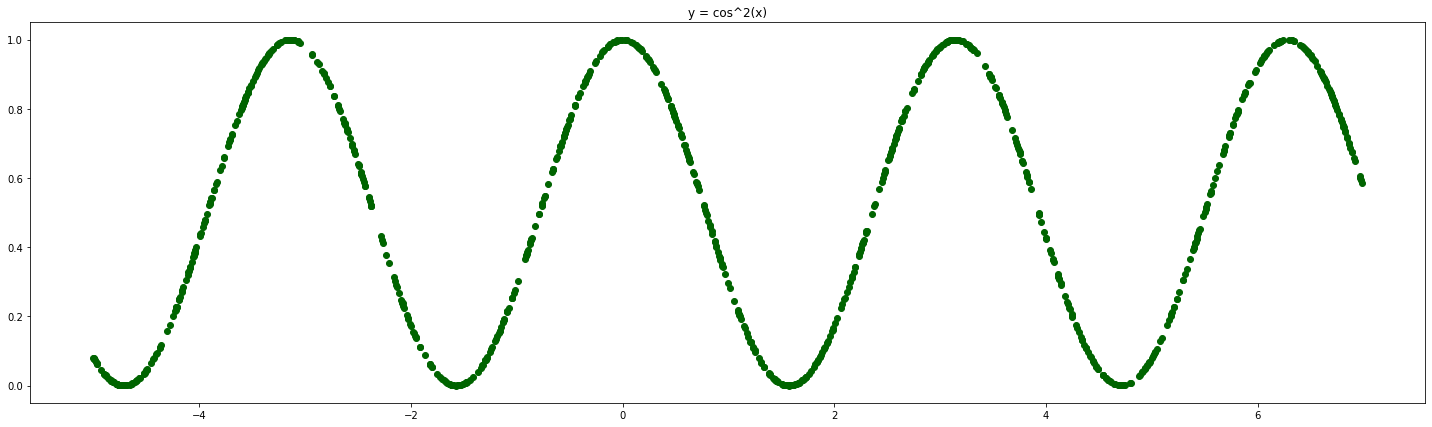

In [279]:
x_train = torch.rand(1000)
x_train = x_train * 12.0 - 5.0

y_sub_train = torch.cos(x_train)**2

plt.figure(figsize = (25, 7))
plt.plot(x_train.numpy(), y_sub_train.numpy(), 'o', c='darkgreen')
plt.title('y = cos^2(x)')

Looks too simple and straightforward, doesn't it? 
Let's add some noise to bring the data closer to reality so that our neural network doesn't get too easy:

Text(0.5, 1.0, 'Noise')

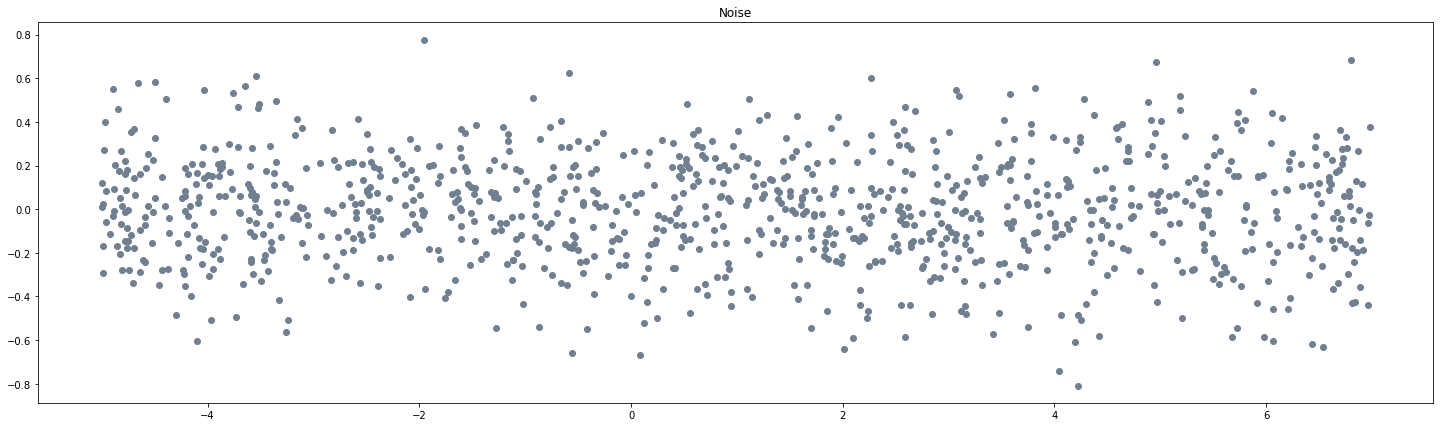

In [280]:
noise = torch.randn(y_sub_train.shape) / 4.

plt.figure(figsize = (25, 7))
plt.plot(x_train.numpy(), noise.numpy(), 'o', c='slategray')
plt.title('Noise')

Text(0.5, 1.0, 'Noisy y = cos^2(x)')

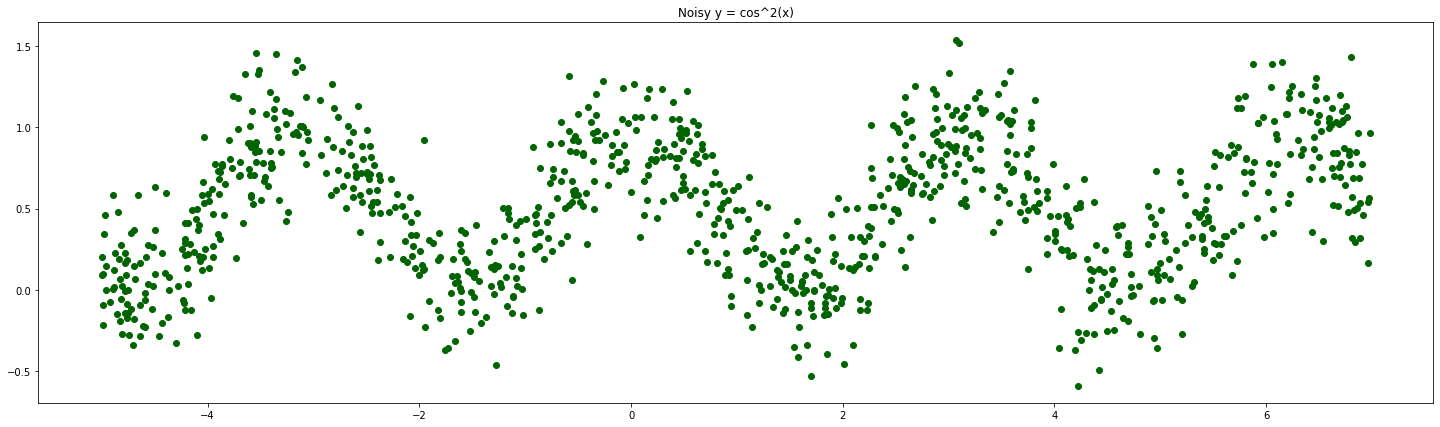

In [281]:
y_train = y_sub_train + noise

plt.figure(figsize = (25, 7))
plt.plot(x_train.numpy(), y_train.numpy(), 'o', c='darkgreen')
plt.title('Noisy y = cos^2(x)')

Now it looks pretty good and noisy, just like we wanted.

And then we need to transform the tensors of the training data:

In [282]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

Creating validation data and target values, just like we did with train. Let's see what the validation target values look like in Plot:

Text(0.5, 1.0, 'Validation y = cos^2(x)')

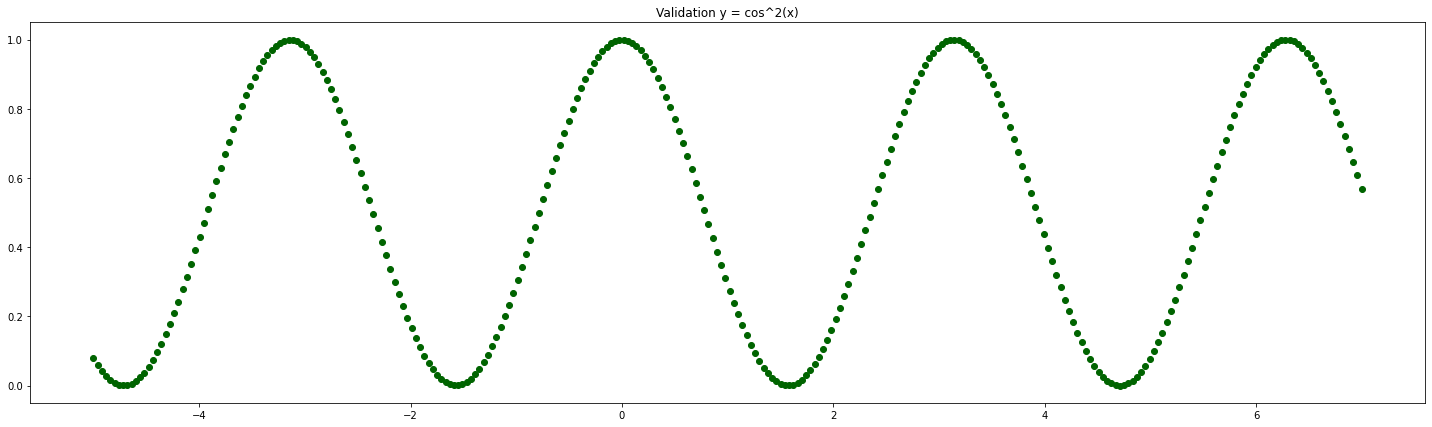

In [283]:
x_val = torch.linspace(-5, 7, 300)
y_val = torch.cos(x_val.data)**2

plt.figure(figsize = (25, 7))
plt.plot(x_val.numpy(), y_val.numpy(), 'o', c='darkgreen')
plt.title('Validation y = cos^2(x)')

Validation tensor transformation is the same as for training data:

In [284]:
x_val.unsqueeze_(1)
y_val.unsqueeze_(1);

Now that the data preparation is over, we can move on to creating the neural network. 
The framework provides the ability to create neural networks quickly and easily by inheriting a new class from the base class and adding network layers and activation functions. 
This network will consist of linear layers, and a sigmoid will be suitable as an activation function.

In [285]:
class SimpleNet(torch.nn.Module):
    def __init__(self, n_hid_n):
        super(SimpleNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hid_n)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hid_n, n_hid_n)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hid_n, 1)


    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

Create an instance of our class, which we will use further:

In [286]:
simple_net = SimpleNet(100)

And then create a function that will show a graphical representation of the validation data and predicted values:

In [287]:
def predict(net, x, y):
    y_pred = net.forward(x)
    
    plt.figure(figsize=(25, 7))
    plt.plot(x.numpy(), y.numpy(), 'o', c='darkcyan', label='True values')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='chocolate', label='Predicted values')
    plt.title('Predictions')
    plt.legend(loc='upper left')

Let's see what our neural network can predict without training:

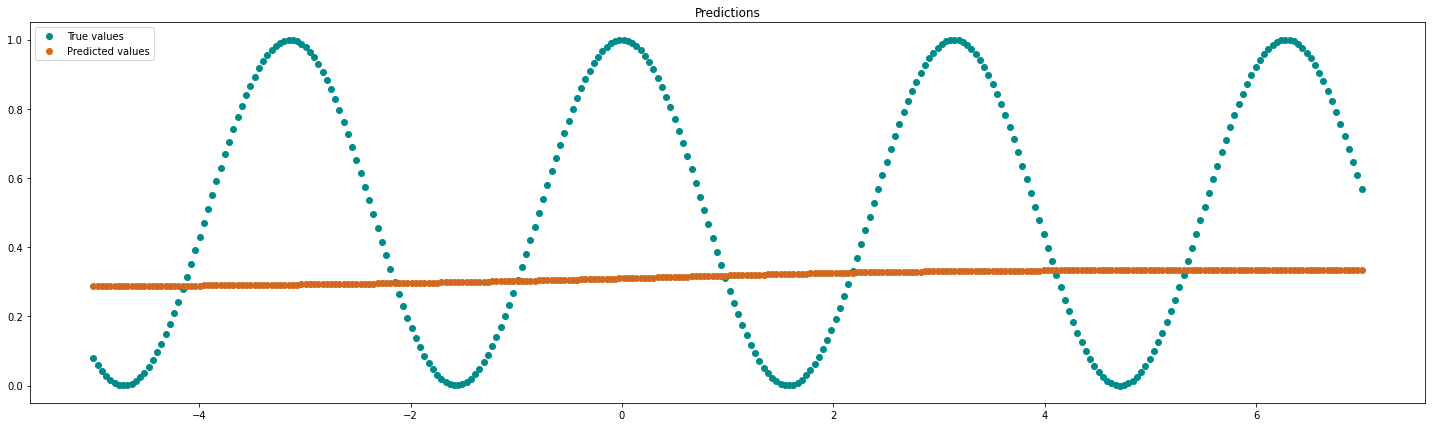

In [288]:
predict(simple_net, x_val, y_val)

Well, so far it looks a little weird. 
But after training it should look much better!

Let's construct an optimizer object, that will hold the current state and will update the parameters based on the computed gradients.
The Adam optimizer was chosen because it is well suited for simple tasks.

In [289]:
optimizer = torch.optim.Adam(simple_net.parameters(), lr=0.001)

Loss function is simple MSE:

In [290]:
def loss(pred, true):
    sq = (pred - true)**2
    return sq.mean()

The training of our neural network begins. The error will decrease as it learns.
It is very important to remember to zero out the gradients to avoid accumulating them.

In [291]:
def learn(n_epochs):
    for epoch in range(n_epochs):
        optimizer.zero_grad()

        y_pred = simple_net.forward(x_train)
        loss_val = loss(y_pred, y_train)
        if epoch % 1000 == 0:
            print(loss_val)

        loss_val.backward()
        optimizer.step()
        
        
learn(20000)

tensor(0.2085, grad_fn=<MeanBackward0>)
tensor(0.1121, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0665, grad_fn=<MeanBackward0>)
tensor(0.0634, grad_fn=<MeanBackward0>)
tensor(0.0623, grad_fn=<MeanBackward0>)
tensor(0.0618, grad_fn=<MeanBackward0>)
tensor(0.0614, grad_fn=<MeanBackward0>)
tensor(0.0611, grad_fn=<MeanBackward0>)
tensor(0.0608, grad_fn=<MeanBackward0>)
tensor(0.0606, grad_fn=<MeanBackward0>)
tensor(0.0603, grad_fn=<MeanBackward0>)
tensor(0.0601, grad_fn=<MeanBackward0>)
tensor(0.0600, grad_fn=<MeanBackward0>)
tensor(0.0598, grad_fn=<MeanBackward0>)
tensor(0.0597, grad_fn=<MeanBackward0>)
tensor(0.0596, grad_fn=<MeanBackward0>)
tensor(0.0595, grad_fn=<MeanBackward0>)
tensor(0.0594, grad_fn=<MeanBackward0>)
tensor(0.0593, grad_fn=<MeanBackward0>)


Finally, look at the visualization of the result of the trained neural network:

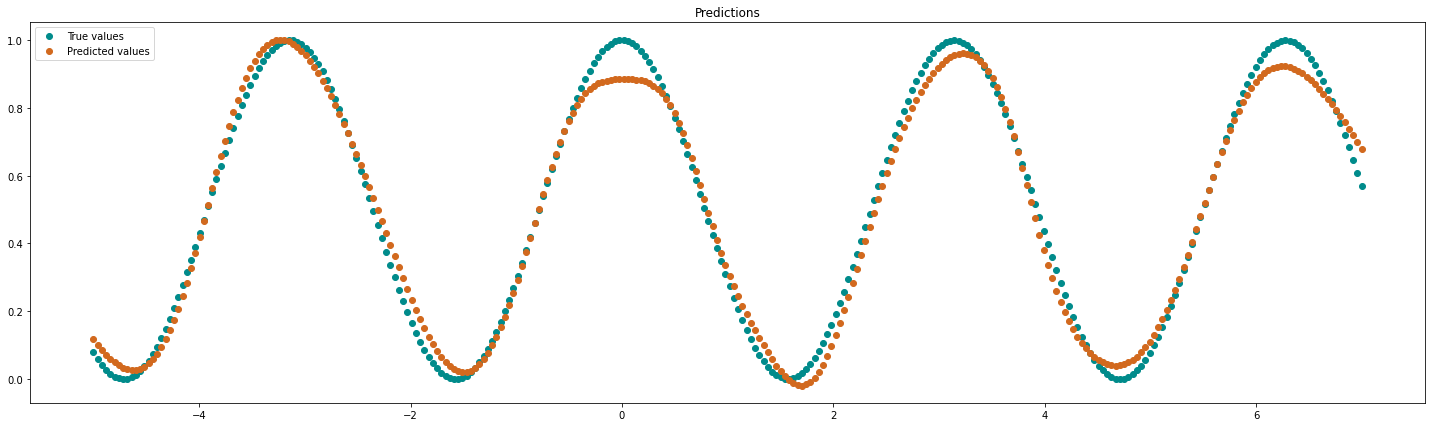

In [292]:
predict(simple_net, x_val, y_val)

Looks good, the neural network did its job, Hooray!